In [1]:
#example of creating matrices with numpy

import numpy as np
x = np.array([[2.5, 3.2],[0, 1],[2, -3]], dtype=np.float32) #dtype is specifying the format of the elements stored in the matrix
print(x)
print(f"Shape: {x.shape}") #num rows, num cols
print(f"Number of dimensions: {x.ndim}") #it is a matrix with rows and cols, so 2
print(f"Number of elements: {x.size}")


[[ 2.5  3.2]
 [ 0.   1. ]
 [ 2.  -3. ]]
Shape: (3, 2)
Number of dimensions: 2
Number of elements: 6


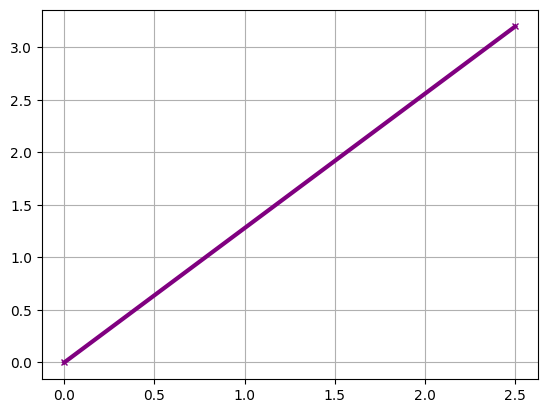

In [2]:
#let's try to plot a vector
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

v = np.array([2.5, 3.2])
plt.plot([0, v[0]],[0, v[1]], 
        marker = 'x', color = 'purple', lw = 3, 
        markersize = 5)  #starting from X, then Y (coordinates)
plt.grid()


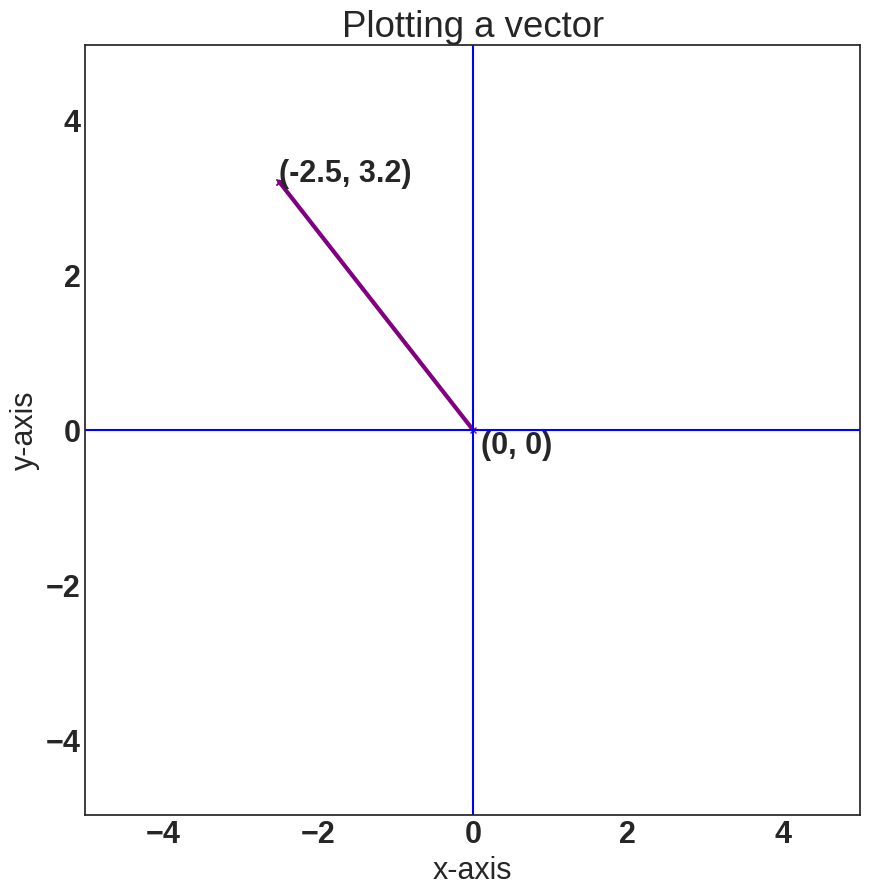

In [3]:
#fancier way to plot the vector v
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
#above allows plots to be displayed directly in the notebook

v = np.array([-2.5, 3.2])

plt.style.use('seaborn-v0_8-white')
font = { 'family': 'sans-serif',
    'weight': 'bold',
    'size': 22}
matplotlib.rc('font', **font) #set the font properties from the dict

#plotting:
plt.figure(figsize =(10,10)) #size of the image 
plt.plot(v[0], v[1], marker = 'x', color = 'purple', lw = 3, markersize = 5)
#all the X first, then the Y
plt.plot([0, v[0]],[0, v[1]], marker = 'x', color = 'purple', lw = 3, markersize = 5)
#stuff:
plt.axis('equal') #sets the aspect ration of the plot to be equal
#label axes
plt.xlabel('x-axis')
plt.ylabel('y-axis')
#add horizontal and vertical lines through the origin
plt.axhline(0, color = 'blue')
plt.axvline(0, color = 'blue')
#title of the plot
plt.title('Plotting a vector')
#annotate the origin and the point represented by the vector
plt.annotate('(0, 0)', xy=(0, 0), xytext = (.1, -.3))
plt.annotate(f'({v[0]}, {v[1]})', xy =(v[0], v[1]), xytext=(v[0], v[1]))
#limits of the axes
plt.axis([-5, 5, -5, 5])
plt.show()

In [4]:
#diagonal matrix 
import numpy as np
A = np.diag(np.ones(3)) #first creates a vector [1, 1, 1]
                        #and then makes it a diagonal matrix
print(A)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [5]:
#is ID symmetric?
import numpy as np
ID = np.diag(np.ones(3))
#if you don't add np.all() you get a matrix of the checks 
np.all(ID==ID.T) # == does the comparison element-wise
#ID == ID.T


True

In [6]:
#Generate an array from 0 to 8 of int64
#reshape it into a 3x3 matrix
import numpy as np
A = np.arange(9).reshape(3, 3)
print(f"A is \n {A}", end = '\n' * 2)
print(f'The transpose of A is: {A.T}', end = '\n' * 2)
print(f'A is of type {A.dtype}')

A is 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]

The transpose of A is: [[0 3 6]
 [1 4 7]
 [2 5 8]]

A is of type int64


In [7]:
#Reduction operations: sum across rows
import numpy as np
A = np.arange(9).reshape(3, 3)

A_c = A.sum(axis = 0, keepdims = False)  #3 (rows canceled out)
A_c.shape
print(A_c)

#works for other operations too like the mean:
A.mean(axis = 0, keepdims = False)

[ 9 12 15]


array([3., 4., 5.])

Generally operations are element-wise:
                $$
                C_{ij} = A_{ij} + B_{ij}
                $$

In [8]:
A = np.arange(9).reshape(3, 3)
B = np.ones_like(A)
C = A + B
print('C', C , 'A', A, 'B', B , sep ='\n\n')
np.allclose(C, A + 1)  # you can sum matrix + scalar, numpy will broadcast
# all.close(): Returns True if two arrays are element-wise equal within a tolerance.

C

[[1 2 3]
 [4 5 6]
 [7 8 9]]

A

[[0 1 2]
 [3 4 5]
 [6 7 8]]

B

[[1 1 1]
 [1 1 1]
 [1 1 1]]


True

In [9]:
#Reduction operations: sum across columns
import numpy as np
A = np.arange(9).reshape(3, 3)
A.sum(axis = (0, 1), keepdims= False)


36

In [10]:
#Inner Product
import numpy as np

x = np.array([1, 2, 3])
y = np.array([1, 0, 1])
np.dot(x, y) == np.sum(x * y)


True

In [11]:
#The angle between 2 vectors is the geometric interpretation of the dot product
import numpy as np
def angle(v, w):
    return np.arccos(v.dot(w) / (np.linalg.norm(v) * np.linalg.norm(w)))
angle(np.array([0, 1, 2]), np.array([2, 3, 4]))

#cosine similarity
def cos_sim(v, w):
    return np.cos(v.dot(w) / (np.linalg.norm(v) * np.linalg.norm(w)))
cos_sim(np.array([0, 1, 2]), np.array([2, 3, 4]))

0.6109785124651403

In [12]:
#Outer product
import numpy as np
x = np.array([1, 2, 3])
y = np.array([1, 0, 1, -1])

np.outer(y, x)

array([[ 1,  2,  3],
       [ 0,  0,  0],
       [ 1,  2,  3],
       [-1, -2, -3]])

In [13]:
#Moving points in space:
import numpy as np
A = np.arange(27).reshape(3, 9)
x = np.ones((9, 1))
b = A @ x #3x9 @ 9x1 = 3x1
b1 = np.matmul(A, x)
b2 = np.dot(A, x)

print( 'A', A, 'x', x, 'b', b, 'b1', b1, 'b2', b2, sep='\n\n')

A

[[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]
 [18 19 20 21 22 23 24 25 26]]

x

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

b

[[ 36.]
 [117.]
 [198.]]

b1

[[ 36.]
 [117.]
 [198.]]

b2

[[ 36.]
 [117.]
 [198.]]


In [14]:
import numpy as np
A = np.random.rand(3, 5)
B = np.random.rand(5, 3)
C = A @ B
print(C)

[[1.26213827 1.18513371 0.76153336]
 [0.83803649 0.52830874 0.80751057]
 [1.68042482 1.07179653 1.42256115]]


In [15]:
#Multiply two matrices w/o reduction (tensors):
import numpy as np
A = np.array([[1, 1, 1,],
            [2, 2, 2],
            [5, 5, 5]])
B = np.array([[0, 1, 0],
            [1, 1, 0],
            [1, 1, 1 ]])

C = np.einsum('ij, jk -> ijk', A, B)
print(C, C.shape, sep = '\n')

[[[0 1 0]
  [1 1 0]
  [1 1 1]]

 [[0 2 0]
  [2 2 0]
  [2 2 2]]

 [[0 5 0]
  [5 5 0]
  [5 5 5]]]
(3, 3, 3)


In [16]:
#the l_2 norm:
import numpy as np
v = np.array([3, -4])
np.linalg.norm(v)

5.0

In [17]:
#the l_1 norm:
import numpy as np
u = np.array([2, 5])
np.abs(u).sum()  #we sum the absolute value of the componenets of the vector
np.linalg.norm(u, 1) #we wrote 1 to specify that we are computing the l_1 norm , not the l_2 norm


7.0

In [18]:
#L1 norm:
import numpy as np
x = np.array([1, 2, 3 , 4])
n1 = np.linalg.norm(x, ord = 1)
n1b = np.abs(x).sum()
#assert n1 == n1b
print(n1, n1b)

10.0 10


# Pyplot:
The pyplot module is a part of the Matplotlib library, which is a popular plotting library in Python used for creating static, animated, and interactive visualizations. 
Matplotlib's pyplot module provides a MATLAB-like interface for creating plots and figures.

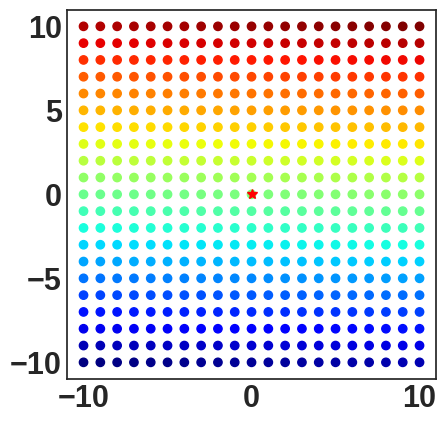

In [19]:
#Demo code
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(Xs, Ys, axs = None): #to plot a grid of points
    '''
    let's define t better: 
    np.arange() is a NumPy fct that generates an array of evenly spaced values w/in a specified range.
    "Xs.size" returns the total number of elements in the array Xs, which is the same a the # of elements in Ys.
    So t is created as an array of integers with range [0, Xs(or Ys)- 1]
    '''
    t = np.arange(Xs.size) #progression of integers used for indexing the colormap
    if axs: #checks if axs, ow it uses the default Matplotlib axis ('plt')
        axs.plot(0, 0, marker = '*', markersize = 7, color = 'r', linestyle = 'none') #plot origin
        axs.scatter(Xs, Ys, c = t, cmap = 'jet', marker = 'o') #scatter x vs y, t
                                                            #ensures that each point on the grid is assigned a unique color based on its position.
        axs.axis('scaled') #axis scaled
    else:
        plt.plot(0, 0, marker='*', markersize=7, color='r',linestyle='none')  # plot origin
        plt.scatter(Xs, Ys, c=t, cmap='jet', marker='o')  # scatter x vs y, jet is a colormap available Matplotlib, used to assign colors to data points
                                                                            #w/ a continuous range of values. (i tried viridis as well)
        plt.axis('scaled') #scaling the axis equally to ensure the aspect ratio is preserved

#let's see it with numpy:
nX, nY, res = 10, 10, 21 #nX and nY are the boundaries of the grid in the x and y direction, and res is the resolution of the grid
X = np.linspace(-nX, +nX, res) #creating linearly spaced arrays 'X' and 'Y' using np.linspace() from -nX to nX with 'res' points
Y = np.linspace(-nY, +nY, res)

Xs, Ys = np.meshgrid(X, Y) #creates a mesh grid from the X and Y arrays, resulting in 'Xs' and 'Ys', which represent the coordinates of points on the grid.
plot_grid(Xs, Ys)

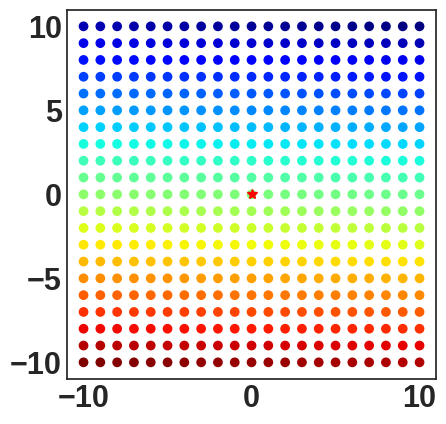

In [20]:
A = np.array([[-1, 0], [0, -1]]) #this is our transf. matrix used to transform each pt in the grid
#[NxN, NxN] -> NxNx2 adding a third axis, like adding another layer
src = np.stack((Xs, Ys), axis = 2) #create a 3D array 
#flatten first 2 dims
# (NN) x 2 #below we are reshaping the src array into a 2D array
src_r = src.reshape(-1, src.shape[-1]) #ask reshape to keep last dim and adjust the rest
# 2x2 @ 2x(NN)
dst = A @ src_r.T #2xNN #contains the transformed coordinates
dst = (dst.T).reshape(src.shape) #reshaping back to the original grid shape
#Access X and Y
Xd, Yd = dst[:,:,0], dst[:,:,1]
plot_grid(Xd, Yd)

# Linear Map could induce Severe Distortion of the space


[[ 2.  -0.7]
 [ 4.  -2. ]]
The rank of this matrix is: 2


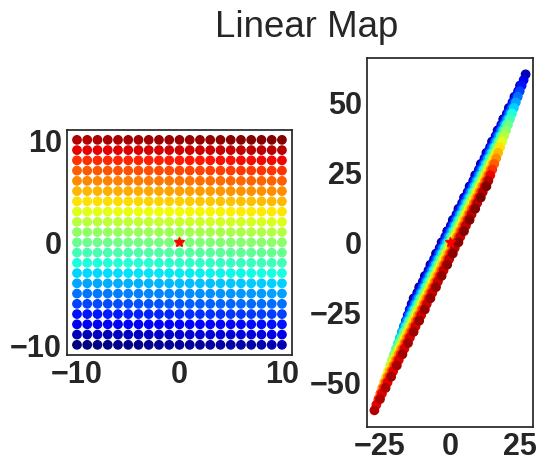

In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def linear_map(A, Xs, Ys):
    #map src pts with A
    src = np.stack((Xs, Ys), axis=2)
    src_r = src.reshape(-1, src.shape[-1])
    dst = A @ src_r.T
    dst = (dst.T).reshape(src.shape)
    return dst[:,:, 0], dst[:,:, 1]

A = np.array([[2, -0.7], [4, -2]])
print(A)
Xd, Yd = linear_map(A, Xs, Ys)
fig, axs = plt.subplots(1, 2)
fig.suptitle('Linear Map')
plot_grid(Xs, Ys, axs[0])
plot_grid(Xd, Yd, axs[1])
print(f"The rank of this matrix is: {np.linalg.matrix_rank(A)}")

In [22]:
is_basis = False
X = np.array([[1, 0], [0, 1]]) if is_basis else np.array([[1, -1], [2, 3]])
theta_rad = angle(*X)
theta = theta_rad*180/np.pi
print(theta_rad)

1.7681918866447774
